## Cherilyn Conner
### Project 2

### 07/23/2019

In [353]:
%pwd

'C:\\Users\\Cherilyn\\Google Drive\\School\\summer\\Financial Models'

## Libraries

In [383]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use ('ggplot')
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
#import statsmodels.api as sm      #tried to use this for regression but it will not install


In [355]:
#to display multiple outputs from one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Reading in and cleaning the data

In [356]:
data=pd.read_csv(r'Trading Analytics.csv')

#to clean all of the column names
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '').str.replace('(', '').str.replace(')', '').str.replace('&', '').str.replace('.', '').str.replace('?', '').str.replace('$', '').str.replace('%', '').str.replace('*', '').str.replace('=', '').str.replace('/', '').str.replace(':', '').str.replace('_', '').str.replace('-', '').str.replace('+', '')

# to remove columns
drop_cols = ['unnamed40','unnamed41', 'unnamed42', 'unnamed43', 'unnamed44', 'unnamed45', 'unnamed46','unnamed47','unnamed48', 'unnamed49', 'unnamed50','qualify','volume',
             'tradetime','eventtime','offer','bid','buyer','seller','buyerid','sellerid','rpertr','upertrq','unrealtot','1sthour','lasthour','1sthrusrtotvol','lasthusrtotvol',
             'range','p2p11','lnp2p1','volatstdevofln']
data = data.drop(drop_cols, axis=1)

#to fix col that start with 1
data.columns = data.columns.str.replace('1', 'fir')

#to split ido into desk number and trader number
    # note trader number no longer has the C in the front
data[['desk','trader']] = data.ido.str.split("C",n=1,expand=True)

#to change the percentages into floats
data['useroftotalvolu'] = data['useroftotalvolu'].str.rstrip('%').astype('float') / 100.0
data['firsthrusrfirsthrtot'] = data['firsthrusrfirsthrtot'].str.rstrip('%').astype('float') / 100.0
data['lasthusrlasthrtot'] = data['lasthusrlasthrtot'].str.replace('#DIV/0!', 'NaN')
data['lasthusrlasthrtot'] = data['lasthusrlasthrtot'].str.rstrip('%').astype('float') / 100.0

data['desk'] = data['desk'].str.replace('S 10', 'S10')
data['desk'] = data['desk'].str.replace('TralS9', 'S9')
data['desk'] = data['desk'].str.replace('S37b08T', 'S3')
data['desk'] = data['desk'].str.replace('S3 ', 'S3')

#column names
data.columns


#data
#data.desk
#data.trader

Index(['ido', 'price', 'realizedtot', 'unrealq', 'uservolu', 'useroftotalvolu',
       'totalvolu', 'tradecount', 'firsthourvolu', 'firsthouruservolu',
       'lasthourvolu', 'lasthouruservolu', 'firsthrusrfirsthrtot',
       'lasthusrlasthrtot', 'vwap', 'pricev', 'net', 'userbuy', 'usersell',
       'uservoltradedbuysell', 'desk', 'trader'],
      dtype='object')

## Looking at the data

In [357]:
data.describe(include="all")
data['lasthourvolu'].describe(include="all")
data['lasthouruservolu'].describe(include="all")

,ido,price,realizedtot,unrealq,uservolu,useroftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,...,firsthrusrfirsthrtot,lasthusrlasthrtot,vwap,pricev,net,userbuy,usersell,uservoltradedbuysell,desk,trader
count,411,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,...,411.000000,407.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000,411,410
unique,396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,268
top,S10C715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S9,10b1
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59,5
mean,NaN,20.808273,3278.796627,-164.790754,953.535280,0.264001,3274.695864,49.150852,1236.871046,206.776156,...,0.143124,0.129663,20.280122,390.257908,-114.771263,394.372263,559.163017,953.535280,NaN,NaN
std,NaN,0.314029,6936.595084,339.833403,890.695766,0.174538,764.241727,39.194719,577.621321,212.855117,...,0.093476,0.104783,0.066117,279.854359,288.169334,458.216085,494.419724,890.695766,NaN,NaN
min,NaN,19.500000,-58791.400130,-2349.000000,0.000000,0.000000,498.000000,0.000000,192.000000,0.000000,...,0.000000,0.000000,19.983490,20.500000,-1861.500000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,20.600000,32.550039,-271.000000,378.500000,0.135250,2860.000000,24.000000,838.000000,70.000000,...,0.077250,0.046850,20.251380,206.000000,-165.799948,140.000000,210.500000,378.500000,NaN,NaN
50%,NaN,20.900000,1543.399964,-76.000000,692.000000,0.227200,3123.000000,40.000000,1046.000000,144.000000,...,0.127600,0.102200,20.286339,370.800000,-45.699832,255.000000,416.000000,692.000000,NaN,NaN
75%,NaN,21.000000,5414.400053,0.000000,1190.000000,0.354200,3504.500000,60.500000,1441.000000,267.000000,...,0.196350,0.191300,20.322672,476.100000,5.650149,457.500000,732.000000,1190.000000,NaN,NaN


count     411.000000
mean     2521.304136
std       733.198747
min         0.000000
25%      2166.000000
50%      2432.000000
75%      2752.000000
max      8474.000000
Name: lasthourvolu, dtype: float64

count     411.000000
mean      369.576642
std       433.008935
min         0.000000
25%       102.000000
50%       231.000000
75%       490.000000
max      4182.000000
Name: lasthouruservolu, dtype: float64

In [358]:
data.corr()

,price,realizedtot,unrealq,uservolu,useroftotalvolu,totalvolu,tradecount,firsthourvolu,firsthouruservolu,lasthourvolu,lasthouruservolu,firsthrusrfirsthrtot,lasthusrlasthrtot,vwap,pricev,net,userbuy,usersell,uservoltradedbuysell
price,1.000000,-0.336094,0.332930,0.024180,-0.071246,0.144427,0.066520,-0.008336,-0.061963,0.114997,-0.007027,-0.087092,-0.102657,0.400903,-0.070372,-0.015885,0.146959,-0.092637,0.024180
realizedtot,-0.336094,1.000000,-0.999467,0.090626,0.245381,-0.001192,0.089200,-0.082310,0.041287,0.054825,0.074470,0.187077,0.258341,-0.657570,0.081461,-0.460407,-0.282543,0.425117,0.090626
unrealq,0.332930,-0.999467,1.000000,-0.113942,-0.264101,-0.022386,-0.113002,0.069339,-0.055296,-0.072330,-0.094506,-0.197565,-0.274132,0.662429,-0.083467,0.475665,0.260080,-0.446302,-0.113942
uservolu,0.024180,0.090626,-0.113942,1.000000,0.919449,0.871457,0.937979,0.535999,0.670323,0.698692,0.880119,0.604691,0.807681,-0.220101,0.138946,-0.352468,0.929665,0.939907,1.000000
useroftotalvolu,-0.071246,0.245381,-0.264101,0.919449,1.000000,0.669003,0.847215,0.450702,0.638827,0.523637,0.801713,0.703307,0.891346,-0.404913,0.129506,-0.307682,0.795693,0.918956,0.919449
totalvolu,0.144427,-0.001192,-0.022386,0.871457,0.669003,1.000000,0.857965,0.649718,0.645810,0.760675,0.731903,0.439588,0.574274,-0.008255,0.137847,-0.442662,0.838682,0.792657,0.871457
tradecount,0.066520,0.089200,-0.113002,0.937979,0.847215,0.857965,1.000000,0.500019,0.603924,0.679029,0.808992,0.541230,0.729513,-0.188401,0.093630,-0.446904,0.869734,0.883719,0.937979
firsthourvolu,-0.008336,-0.082310,0.069339,0.535999,0.450702,0.649718,0.500019,1.000000,0.880310,0.165202,0.285558,0.552338,0.285399,-0.150458,0.089495,-0.306462,0.546659,0.458971,0.535999
firsthouruservolu,-0.061963,0.041287,-0.055296,0.670323,0.638827,0.645810,0.603924,0.880310,1.000000,0.251187,0.398797,0.831616,0.427316,-0.288744,0.120362,-0.327621,0.630993,0.622796,0.670323
lasthourvolu,0.114997,0.054825,-0.072330,0.698692,0.523637,0.760675,0.679029,0.165202,0.251187,1.000000,0.825311,0.221166,0.595116,0.129903,0.120068,-0.243706,0.652249,0.654203,0.698692


## Histograms for each numerical variable to view distributions
##### I wanted to look at all of the histograms to get a feel for the data of each variable
##### I used sns.distplot so that I can view the histogram and the kernal density estimation at the same time

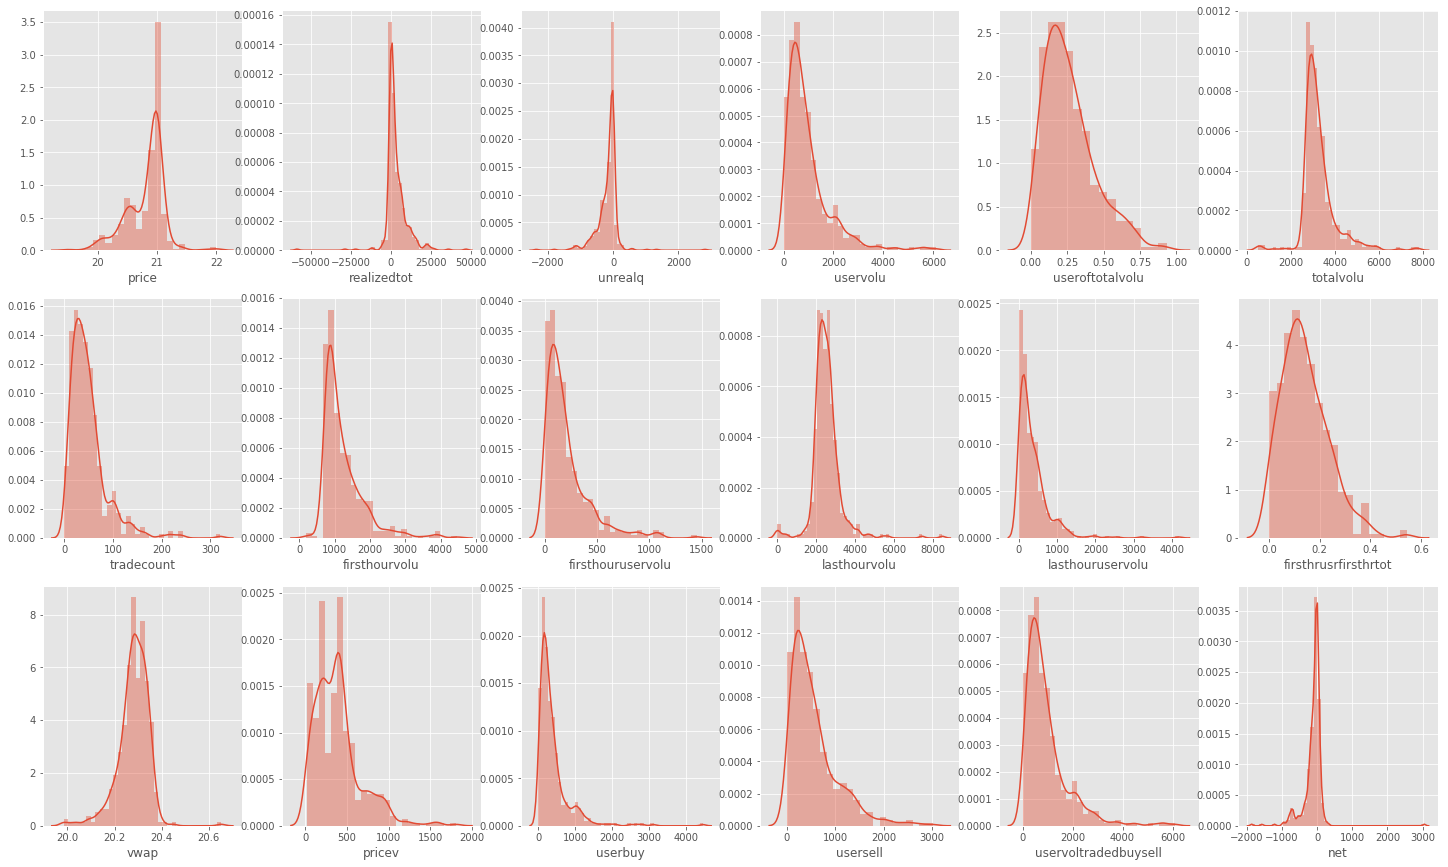

In [360]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(3, 6, 1)
sns.distplot(data.price)
#mostly centered, a little right skewed

ax = fig.add_subplot(3, 6, 2)
sns.distplot(data.realizedtot)
#mostly centered, a little left skewed

ax = fig.add_subplot(3, 6, 3)
sns.distplot(data.unrealq)
#mostly centered, a little right skewed

ax = fig.add_subplot(3, 6, 4)
sns.distplot(data.uservolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 5)
sns.distplot(data.useroftotalvolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 6)
sns.distplot(data.totalvolu)
#skewed to the right but not all the way over

ax = fig.add_subplot(3, 6, 7)
sns.distplot(data.tradecount)
#skewed to the right

ax = fig.add_subplot(3, 6, 8)
sns.distplot(data.firsthourvolu)
#skewed to the right but not all the way over

ax = fig.add_subplot(3, 6, 9)
sns.distplot(data.firsthouruservolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 10)
sns.distplot(data.lasthourvolu)
#skewed to the right

ax = fig.add_subplot(3, 6, 11)
sns.distplot(data.lasthouruservolu)
#skewed to the right but not all the way over

ax = fig.add_subplot(3, 6, 12)
sns.distplot(data.firsthrusrfirsthrtot)
#skewed to the right

ax = fig.add_subplot(3, 6, 13)
sns.distplot(data.vwap)
#mostly centered, a little right skewed

ax = fig.add_subplot(3, 6, 14)
sns.distplot(data.pricev)
#skewed to the right

ax = fig.add_subplot(3, 6, 15)
sns.distplot(data.userbuy)
#skewed to the right

ax = fig.add_subplot(3, 6, 16)
sns.distplot(data.usersell)
#skewed to the right

ax = fig.add_subplot(3, 6, 17)
sns.distplot(data.uservoltradedbuysell)
#skewed to the right

ax = fig.add_subplot(3, 6, 18)
sns.distplot(data.net);
#mostly centered, a little right skewed


## Looking at box plots of all of the numerical variables to see the spread of data and to look for outliers

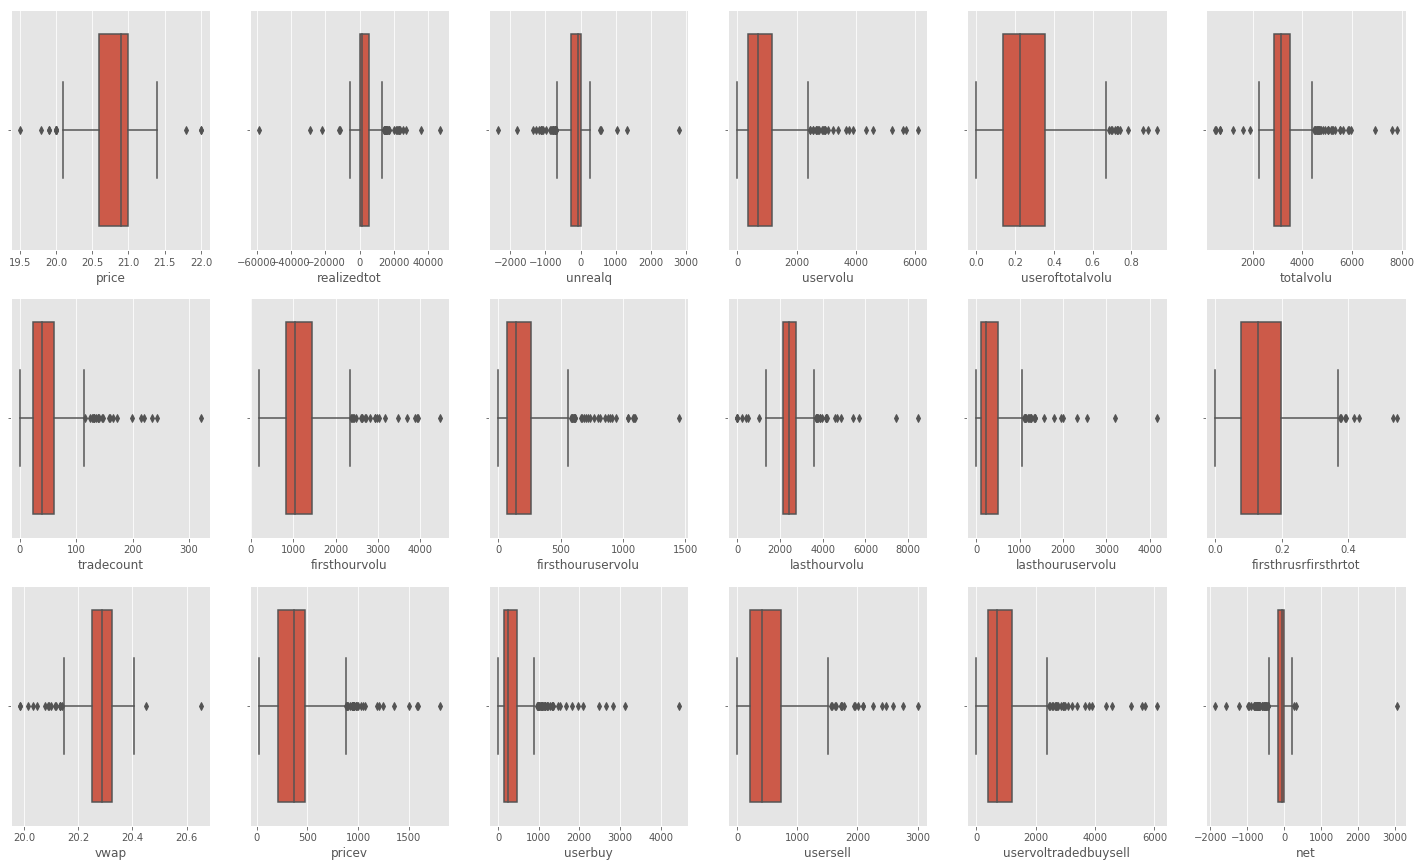

In [361]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(3, 6, 1)
sns.boxplot(data.price)
#low variability in the price, ranged from 19.5 to 22
#middle 50% of the data between 20.6 and 21
#outliers below 20 and above 21.5

ax = fig.add_subplot(3, 6, 2)
sns.boxplot(data.realizedtot)
#middle 50% of the data between 32.5 and 5414.4
#outliers above 13487 going upto 46923.9 and below -8041 going down to -58791.4
#more outliers above than below

ax = fig.add_subplot(3, 6, 3)
sns.boxplot(data.unrealq)
#middle 50% of the data between -271 and 0
#outliers above 406.5 going upto 2811 and below -677.5 going down to -2349
#more ourliers below than above

ax = fig.add_subplot(3, 6, 4)
sns.boxplot(data.uservolu)
#most of the data below 2000
##middle 50% of the data between 1190 and 378.5
#outliers above 2407 going upto 6107
#nothing below 0

ax = fig.add_subplot(3, 6, 5)
sns.boxplot(data.useroftotalvolu)
#middle 50% of the data between 13% and 35%
#outliers aabove 68% up to 93% 
#nothing below 0

ax = fig.add_subplot(3, 6, 6)
sns.boxplot(data.totalvolu)
#middle 50% of the data between 2860 and 3504
#outliers above 4470 upto 7800 and below 1894 down to 498

ax = fig.add_subplot(3, 6, 7)
sns.boxplot(data.tradecount)
#most of the data less than 100
#middle 50% between 60.5 and 24
#outliers above 115 
#nothing below 0

ax = fig.add_subplot(3, 6, 8)
sns.boxplot(data.firsthourvolu)
#most of the data less than 2000
#middle 50% between 838 and 1441
#outliers above 2345.5 upto 4466
#nothing below 0

ax = fig.add_subplot(3, 6, 9)
sns.boxplot(data.firsthouruservolu)
#most of the data less than 500
#middle 50% between 70 and 267
#outliers above 562.5 upto 1450
#nothing below 0

ax = fig.add_subplot(3, 6, 10)
sns.boxplot(data.lasthourvolu)
#middle 50% between 2166 and 2752
#outliers above 3181 upto 8474 and below 1557 down to zero
#nothing below 0

ax = fig.add_subplot(3, 6, 11)
sns.boxplot(data.lasthouruservolu)
#middle 50% between 102 and 490
#outliers above 1772 upto 4182
#nothing below 0

ax = fig.add_subplot(3, 6, 12)
sns.boxplot(data.firsthrusrfirsthrtot)
#middle 50% between 7% and 19%
#outliers above 37% upto 54%
#nothing below 0


ax = fig.add_subplot(3, 6, 13)
sns.boxplot(data.vwap)
# data between 19.98 and 20.65
#middle 50% between 20.25 and 20.32
#outliers above 20.425 and below 20.145

ax = fig.add_subplot(3, 6, 14)
sns.boxplot(data.pricev)
#middle 50% between 206 and 476.1
#outliers above 881 upto 1809
#nothing below 20.5

ax = fig.add_subplot(3, 6, 15)
sns.boxplot(data.userbuy)
#middle 50% between 140 and 457.5
#outliers above 933 upto 4459
#nothing below 0

ax = fig.add_subplot(3, 6, 16)
sns.boxplot(data.usersell)
#middle 50% between 210.5 and 732
#outliers above 1514 upto 3014
#nothing below 0

ax = fig.add_subplot(3, 6, 17)
sns.boxplot(data.uservoltradedbuysell)
#middle 50% between 378.5 and 1190
#outliers above 2407 upto 6107
#nothing below 0

ax = fig.add_subplot(3, 6, 18)
sns.boxplot(data.net);
#middle 50% between -165.7 and 5.6
#outliers above 262.5 upto 3050 and below 422.65 down to -1861.5
#more outliers below than above #one at 3050 seems to be drastic outlier


## Looking at scatter plots between some of the variables

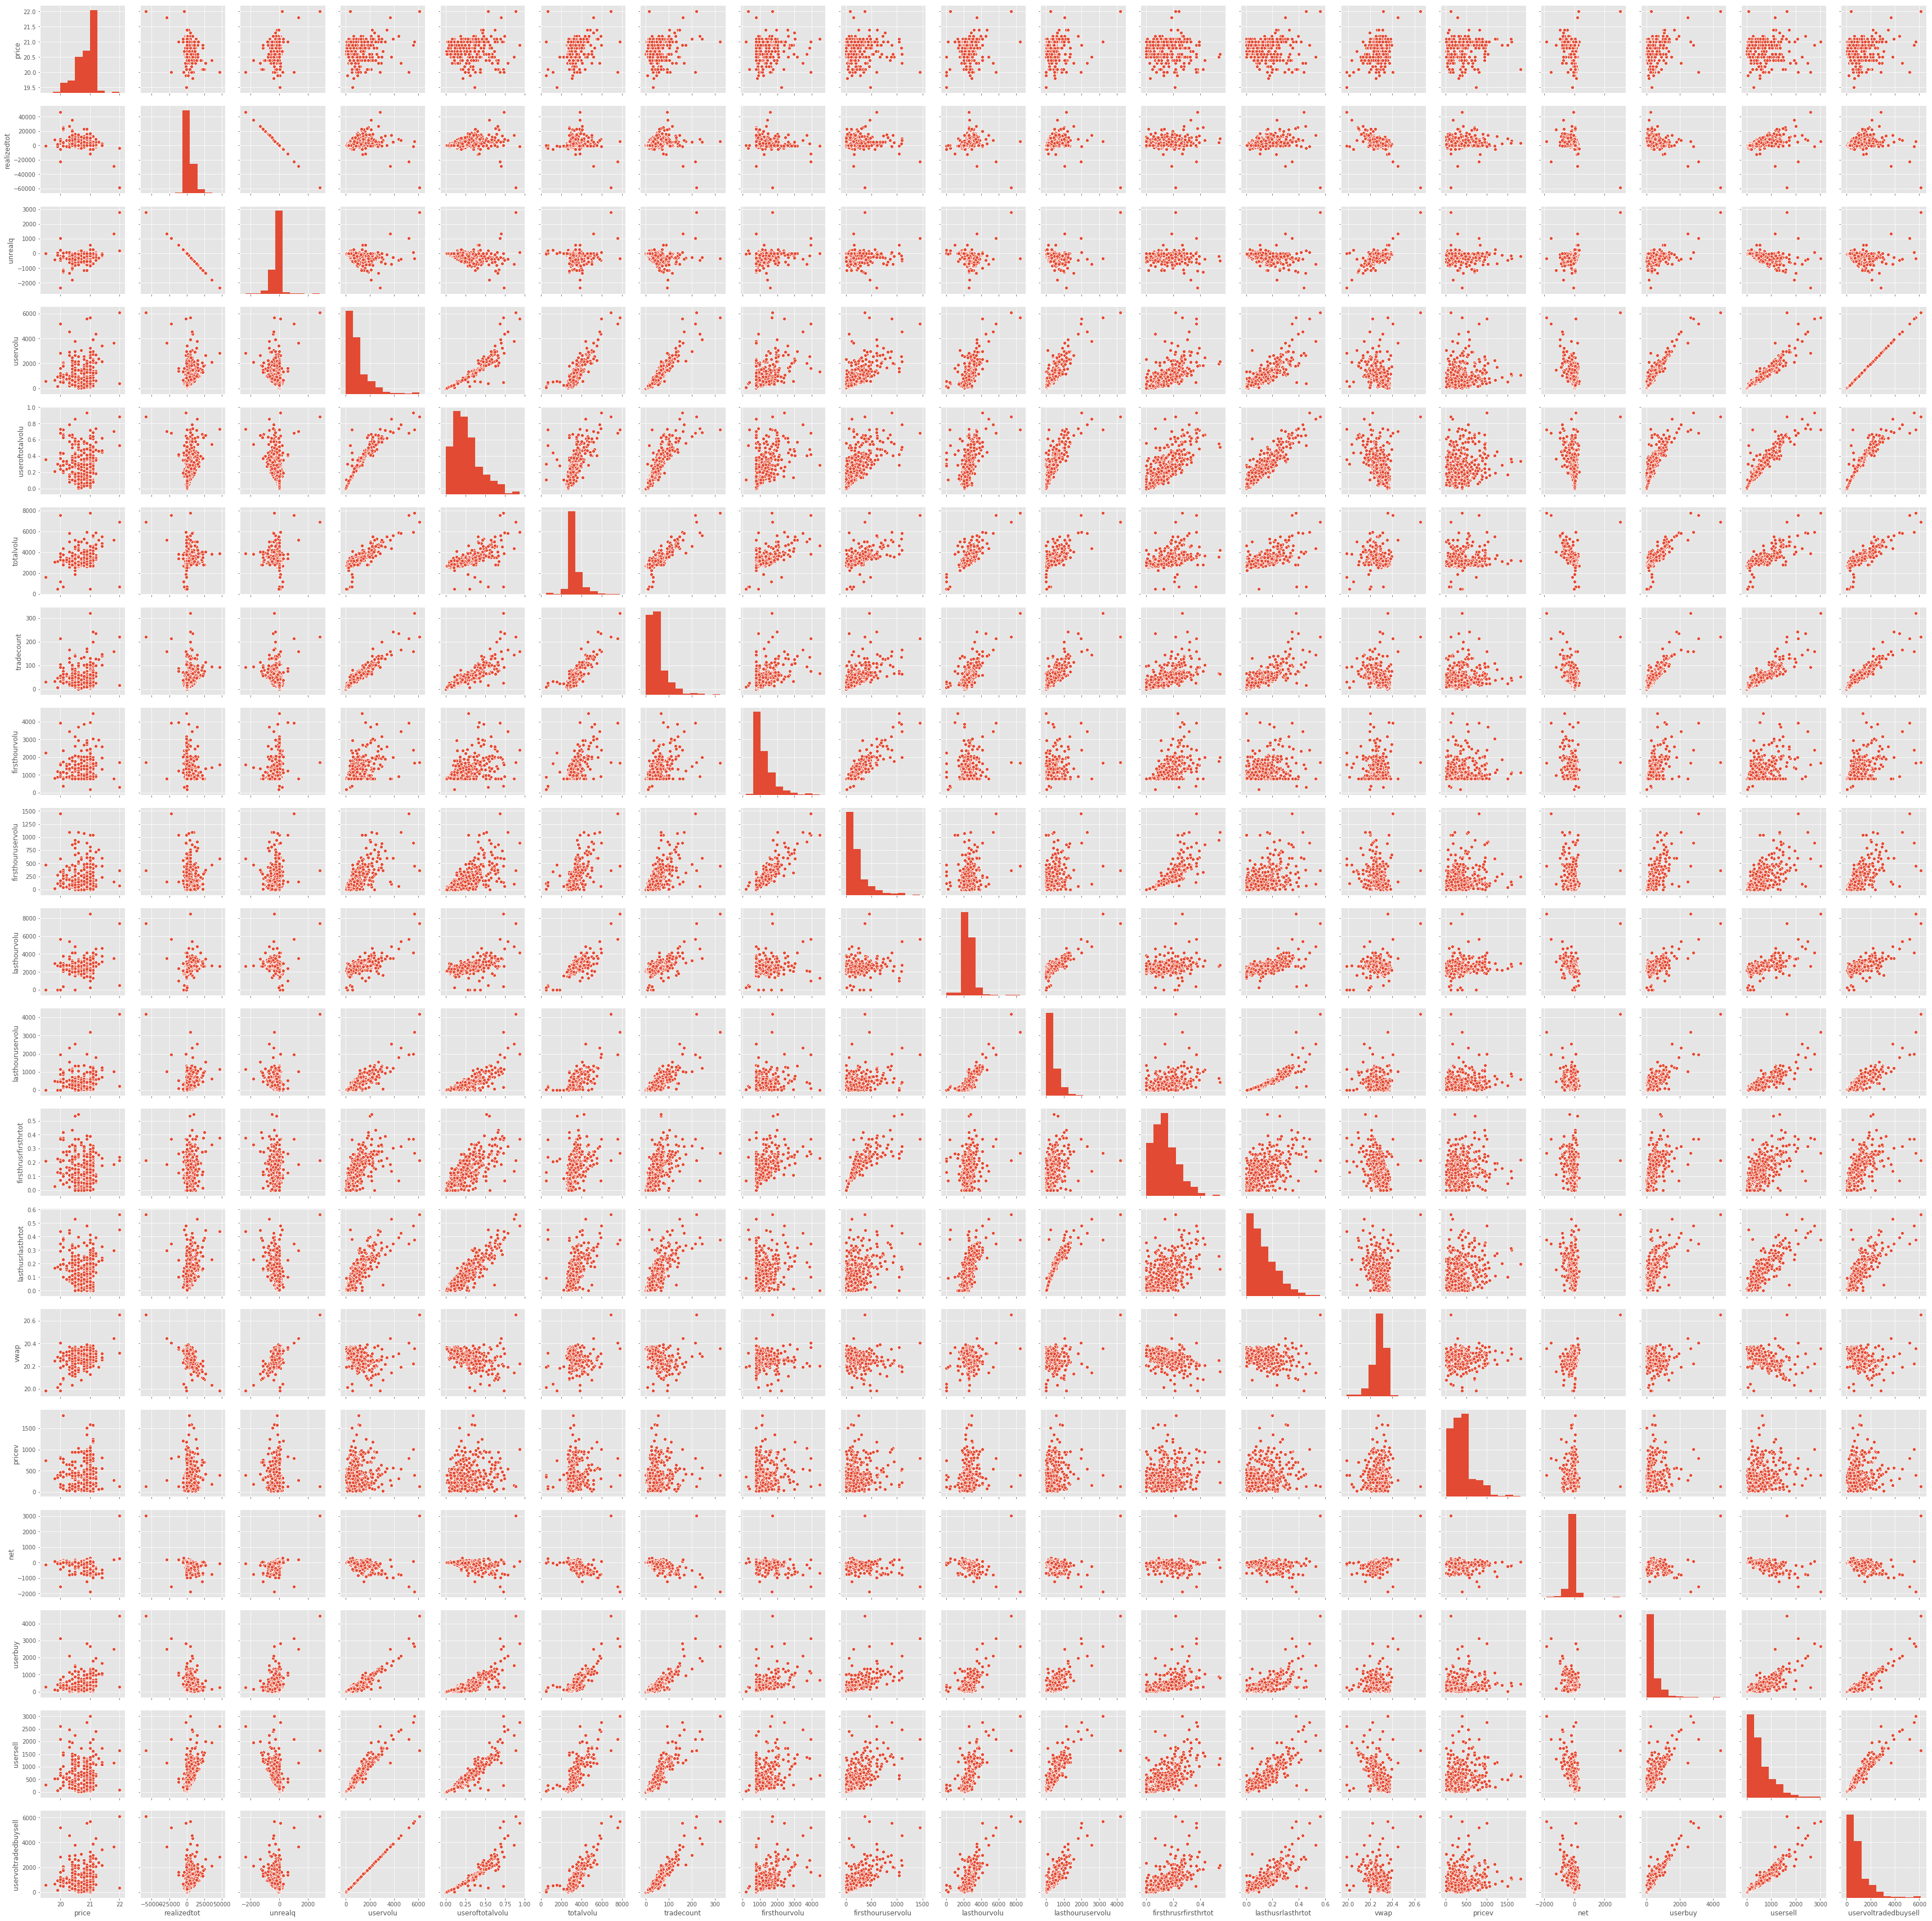

In [287]:
#to get an overview of the scatter plots
#sns.pairplot(data); #do not run more than nessecary

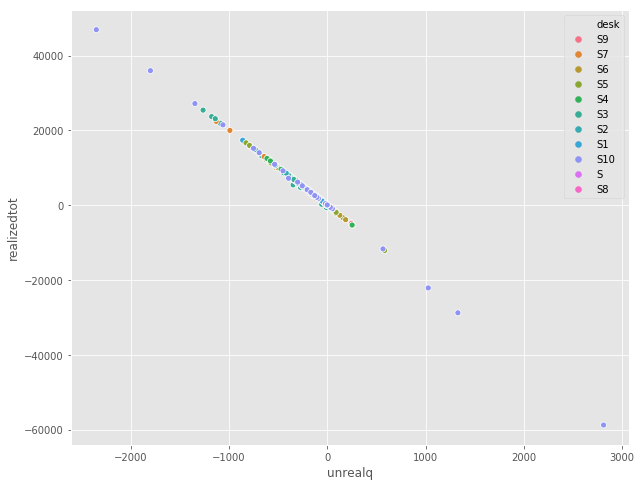

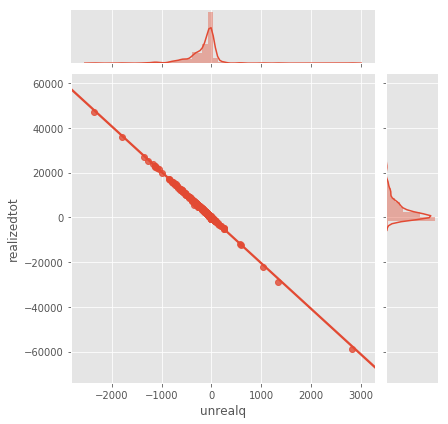

In [362]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="unrealq", y="realizedtot", hue="desk", data=data);
sns.jointplot(x="unrealq", y="realizedtot", data=data, kind="reg");
#strong negative linear correlation between final quantity of stock and realized total; only a few points are not fully on the regression line
#as the final quantity increases realized total decreases
#highest amount of final quantity is bellow zero indicating that more were short/oversold
#Realized total skews to just below zero

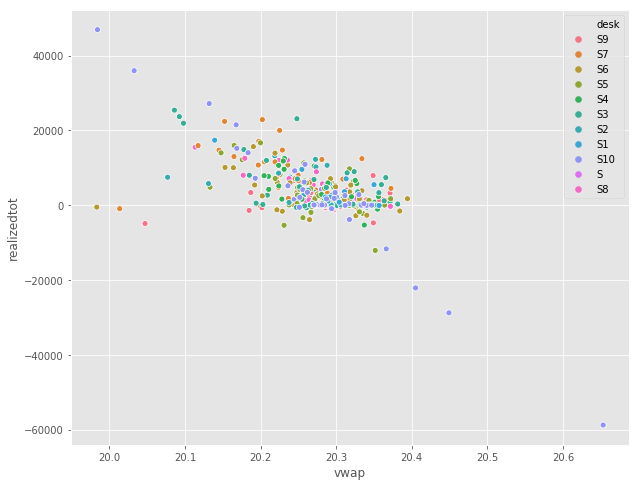

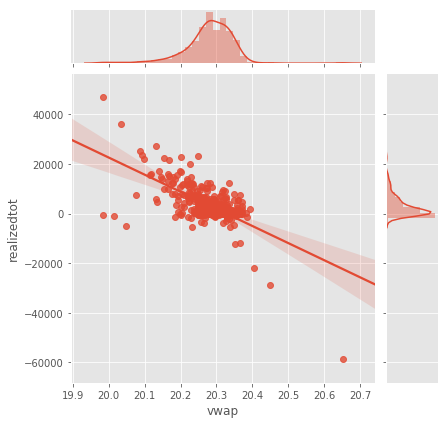

In [364]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="vwap", y="realizedtot", hue="desk", data=data)
sns.jointplot(x="vwap", y="realizedtot", data=data, kind="reg");
#looking into if the volume weighted average price effects the realized total
#most of the data is center distributed for both of them with a negative corelation

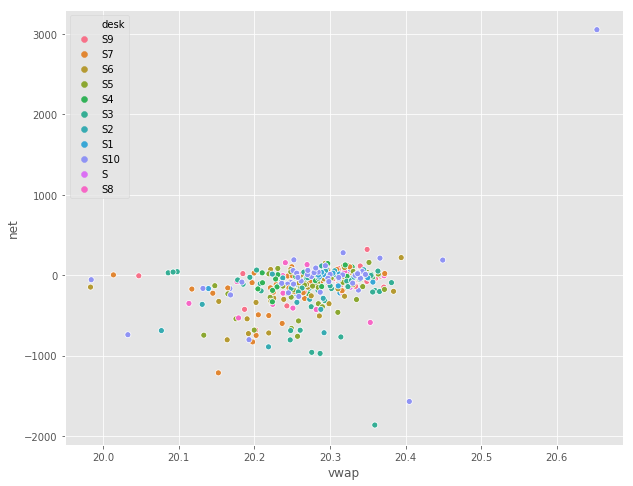

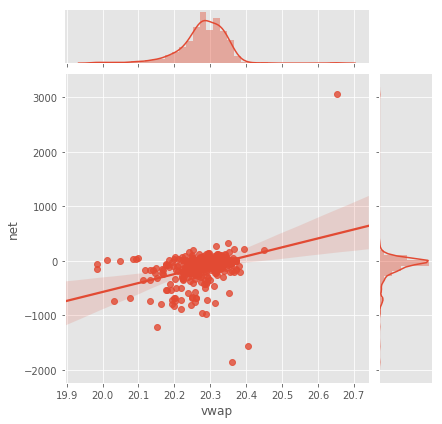

In [365]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="vwap", y="net", hue="desk", data=data)
sns.jointplot(x="vwap", y="net", data=data, kind="reg");
#looking into if the volume weighted average price effects the net money
#there is a slight positive corelation between the two but the 95% confidence interval is wider;
#there is one drastic outlier in the data that appears to be skewing the line to be more positive

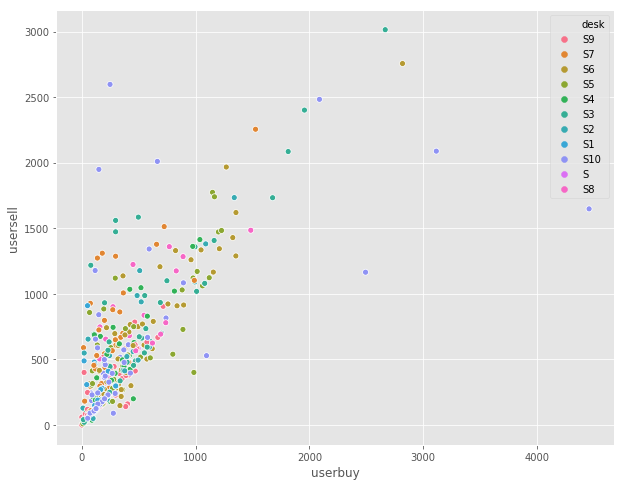

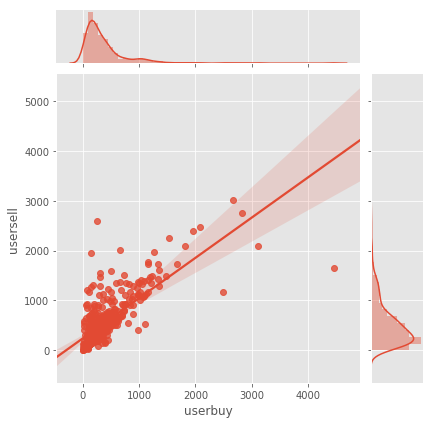

In [366]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="userbuy", y="usersell", hue="desk", data=data)
sns.jointplot(x="userbuy", y="usersell", data=data, kind="reg");
#looking to see if there is a corelation between how much a user buys and how much they sell
#there is a positive corelation between the two but the 95% confidence is wider

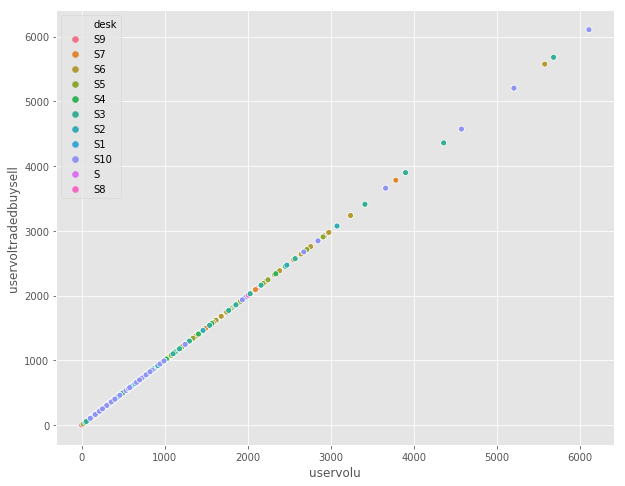

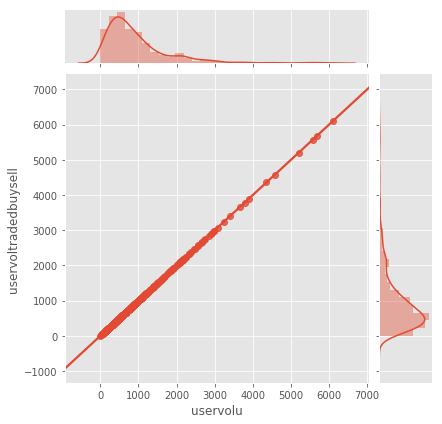

In [367]:
axes = plt.subplots(figsize = (10,8))
sns.scatterplot(x="uservolu", y="uservoltradedbuysell", hue="desk", data=data)
sns.jointplot(x="uservolu", y="uservoltradedbuysell", data=data, kind="reg");
#I explored these two since they apeared to have a strong linear correlation; upon further investigation of the spread of data I believe they are actually the exact same data.
#their summary statistics are exactly the same #oops looked at the notes again and they are the same

## Experimenting with some regressions
#### looking at different independent variables with both dependent variables

In [368]:
df = pd.DataFrame(data.unrealq)
target = pd.DataFrame(data.realizedtot)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) #really good r squared, this is expected based on the plot from above

lm.coef_ #coefficient of -20 makes sense since the line was decreasing
lm.intercept_ #intercept of -83 this seems plausable based on the graph

0.998933309343536

array([[-20.40086244]])

array([-83.07688142])

In [369]:
df = pd.DataFrame(data.vwap)
target = pd.DataFrame(data.realizedtot)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) #r squared not great; not unexpected as the data is a little less consistent

lm.coef_ #coefficient of -68988 apears to be really high but makes sense when you look at the range for vwap is less than 1
lm.intercept_ #this appears to not make sense based on the graph but the graph is a 30K at x=19.9 and -30k at x=20.75 therefore the x intercept would be very high

0.4323985242253614

array([[-68988.41616164]])

array([1402372.2661368])

In [370]:
df = pd.DataFrame(data.vwap)
target = pd.DataFrame(data.net)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) #very poor r squared of .14 this make sense based on the grouping of the data and the width of the 95% confidence interval

lm.coef_ #coefficient of 1638 makes sense since the line was increasing
lm.intercept_ #intercept of -33334 could make sense as the graph is just above -1000 at 19.9

0.14124897575970818

array([[1638.05373751]])

array([-33334.70026541])

In [371]:
df = pd.DataFrame(data.userbuy)
target = pd.DataFrame(data.usersell)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # moderate r squared, shows some corelation but nor at strong as it could be

lm.coef_ #coefficient of .8 makes sense since the line seems to be increasing a little less than y=x
lm.intercept_ #intercept of 240 seems high compared to the data but seems to match the jointplot line

0.5595228246026137

array([[0.80711303]])

array([240.86002316])

In [372]:
df = pd.DataFrame(data.totalvolu)
target = pd.DataFrame(data.realizedtot)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # absolutely horrible model

1.4203290876757535e-06

In [373]:
df = pd.DataFrame(data.totalvolu)
target = pd.DataFrame(data.net)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # pretty bad model

lm.coef_ #slope is just slightly smaller than a straight line
lm.intercept_ 

0.19594942530317383

array([[-0.16691256]])

array([431.81660016])

In [374]:
df = pd.DataFrame(data.uservolu)
target = pd.DataFrame(data.net)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # pretty bad model

lm.coef_ #slope is just slightly smaller than a straight line
lm.intercept_ 

0.12423395534463953

array([[-0.1140351]])

array([-6.03477668])

In [375]:
df = pd.DataFrame(data.uservolu)
target = pd.DataFrame(data.realizedtot)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # really bad model

lm.coef_ #slope is not much bigger than a straight line
lm.intercept_ 

0.008213121490670217

array([[0.70578282]])

array([2605.80781291])

In [376]:
df = pd.DataFrame(data.useroftotalvolu)
target = pd.DataFrame(data.realizedtot)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # really bad model

lm.coef_ #positive corelation
lm.intercept_ 

0.06021204506632049

array([[9752.09982451]])

array([704.23515498])

In [377]:
df = pd.DataFrame(data.useroftotalvolu)
target = pd.DataFrame(data.net)

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # really bad model

lm.coef_ #negative correlation
lm.intercept_ 

0.09466836801487877

array([[-507.99602348]])

array([19.3400576])

In [378]:
df = pd.DataFrame(data.realizedtot)
target = pd.DataFrame(data.net)
#although both dependent variables I wanted to see if there is any correlation

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # decently bad model

lm.coef_ #very slight negative correlation but close to no slope
lm.intercept_ 

0.21197437870354796

array([[-0.01912683]])

array([-52.0582624])

In [379]:
df = pd.DataFrame(data.tradecount)
target = pd.DataFrame(data.net)
#although both dependent variables I wanted to see if there is any correlation

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # decently bad model

lm.coef_ #slight negative correlation
lm.intercept_ 

0.1997229855707503

array([[-3.28574788]])

array([46.72604276])

In [380]:
df = pd.DataFrame(data.tradecount)
target = pd.DataFrame(data.realizedtot)
#although both dependent variables I wanted to see if there is any correlation

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # very bad model

lm.coef_ #positive correlation
lm.intercept_ 

0.007956556399783321

array([[15.78633685]])

array([2502.88472767])

In [381]:
df = pd.DataFrame(data.pricev)
target = pd.DataFrame(data.net)
#although both dependent variables I wanted to see if there is any correlation

X=df
y=target

lm = linear_model.LinearRegression()
model = lm.fit(X,y)


predictions = lm.predict(X)
# print(predictions)

lm.score(X,y) # decently bad model

lm.coef_ #slight negative correlation
lm.intercept_ 

0.011166043415145377

array([[-0.10880913]])

array([-72.30763952])